In [234]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [235]:
data_train = pd.read_csv("E:\\Lomba\\random_project\\Titanic\\titanic\\train.csv")
data_test = pd.read_csv("E:\\Lomba\\random_project\\Titanic\\titanic\\test.csv")
submission = pd.read_csv("E:\\Lomba\\random_project\\Titanic\\titanic\\gender_submission.csv")

In [236]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [238]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# EDA

In [239]:
# corelation matrix

numerical_data = data_train.select_dtypes(include=['int64','float64'])
correlation_with_survived = numerical_data.corr()['Survived'].sort_values(ascending=False)
correlation_with_survived

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

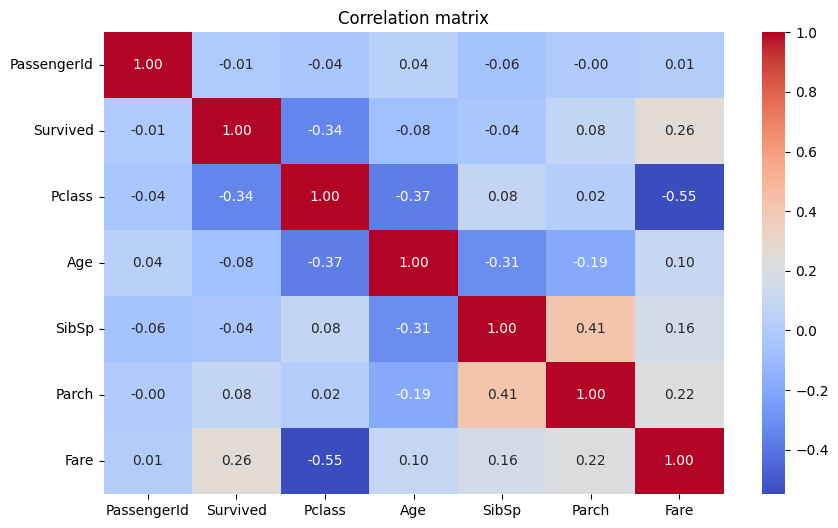

In [240]:
corr_mat = numerical_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# Preprocessing

In [241]:
# Age

median_age_train = data_train['Age'].mean()
median_age_test = data_test['Age'].mean()

data_train['Age'].fillna(round(median_age_train),inplace=True)
data_test['Age'].fillna(round(median_age_test),inplace=True)

In [242]:
# Cabin

#data_train['Cabin_dec'] = data_train['Cabin'].astype(str).str[0]
#data_train['Cabin_dec'] = data_train['Cabin'].replace('n',np.nan)
#data_train['Cabin_dec'] = data_train['Cabin'].fillna('Unknown')
#data_train = pd.get_dummies(data_train,columns=['Cabin_dec'],prefix='Deck')

#data_test['Cabin_dec'] = data_test['Cabin'].astype(str).str[0]
#data_test['Cabin_dec'] = data_test['Cabin'].replace('n',np.nan)
#data_test['Cabin_dec'] = data_test['Cabin'].fillna('Unknown')
#data_test = pd.get_dummies(data_test,columns=['Cabin_dec'],prefix='Deck')

data_train.drop(columns=['Cabin'])
data_test.drop(columns=['Cabin'])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S


In [243]:
data_train['Has_cabin'] = data_train['Cabin'].notnull().astype(int)
data_test['Has_cabin'] = data_test['Cabin'].notnull().astype(int)

data_train.drop(columns=['Cabin'],inplace=True)
data_test.drop(columns=['Cabin'],inplace=True)

In [244]:
# Embarked

embarked_mode_train = data_train['Embarked'].mode()[0]
embarked_mode_test = data_test['Embarked'].mode()[0]

data_train['Embarked'].fillna(embarked_mode_train,inplace=True)
data_test['Embarked'].fillna(embarked_mode_test,inplace=True)

data_train['Embarked'] = data_train['Embarked'].map({'S':0,'C':1,'Q':2})
data_test['Embarked'] = data_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [245]:
# Ticket

#def extract_ticket_prefix(ticket):
    #ticket = ticket.replace('.','').replace('/','')
    #parts = ticket.split()
    #prefix = parts[0] if not parts[0].isdigit() else 'None'
    #return prefix.upper()

#data_train['Ticket_prefix'] = data_train['Ticket'].apply(extract_ticket_prefix)
#data_test['Ticket_prefix'] = data_test['Ticket'].apply(extract_ticket_prefix)

#data_train = pd.get_dummies(data_train,columns=['Ticket_prefix'],prefix='T')
#data_test = pd.get_dummies(data_test,columns=['Ticket_prefix'],prefix='T')

data_train.drop(columns=['Ticket'],inplace=True)
data_test.drop(columns=['Ticket'],inplace=True)

In [246]:
# Sex

data_train['Sex'] = data_train['Sex'].map({'male':0,'female':1})
data_test['Sex'] = data_test['Sex'].map({'male':0,'female':1})

In [247]:
# Name

data_train['Name'] = data_train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
data_test['Name'] = data_test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

data_train['Name'] = data_train['Name'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_train['Name'] = data_train['Name'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

data_test['Name'] = data_test['Name'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_test['Name'] = data_test['Name'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

data_train['Name'] = data_train['Name'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
data_test['Name'] = data_test['Name'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [248]:
# Fare

data_train['Fare'] = data_train['Fare'].apply(lambda x: np.log1p(x))
data_test['Fare'] = data_test['Fare'].apply(lambda x: np.log1p(x))

In [249]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_cabin
0,1,0,3,0,0,22.0,1,0,2.110213,0,0
1,2,1,1,2,1,38.0,1,0,4.280593,1,1
2,3,1,3,1,1,26.0,0,0,2.188856,0,0
3,4,1,1,2,1,35.0,1,0,3.990834,0,1
4,5,0,3,0,0,35.0,0,0,2.202765,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,4,0,27.0,0,0,2.639057,0,0
887,888,1,1,1,1,19.0,0,0,3.433987,0,1
888,889,0,3,1,1,30.0,1,2,3.196630,0,0
889,890,1,1,0,0,26.0,0,0,3.433987,1,1


In [250]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_cabin
0,892,3,0,0,34.5,0,0,2.178064,2,0
1,893,3,2,1,47.0,1,0,2.079442,0,0
2,894,2,0,0,62.0,0,0,2.369075,2,0
3,895,3,0,0,27.0,0,0,2.268252,0,0
4,896,3,2,1,22.0,1,1,2.586824,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,30.0,0,0,2.202765,0,0
414,1306,1,4,1,39.0,0,0,4.699571,1,1
415,1307,3,0,0,38.5,0,0,2.110213,0,0
416,1308,3,0,0,30.0,0,0,2.202765,0,0


# Modeling

In [251]:
data_train.drop(columns=['PassengerId'])
X = data_train.drop(columns=['Survived'])
y = data_train['Survived']

In [252]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import optuna

In [253]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)
    scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
    return scores.mean()

In [254]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50,timeout=1200)


[I 2025-05-18 18:55:36,663] A new study created in memory with name: no-name-a9e7e76d-2308-4fa4-bc90-fa40ec8de8ca
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  wa

In [255]:
best_model = XGBClassifier(
    **study.best_params,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_model.fit(X,y)

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8819527039643303, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.4028057219109836, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1099715598709074,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=365, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [256]:
scores = cross_val_score(best_model,X,y,cv=5,scoring='roc_auc')
scores

c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\MSI_PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([0.84525692, 0.81209893, 0.89893048, 0.88074866, 0.90672783])

In [257]:
y_pred = best_model.predict(data_test)

In [258]:
submission = pd.DataFrame({
    'PassengerId' : data_test['PassengerId'],
    'Survived' : y_pred
})

submission.to_csv('submission.csv',index=False)